# Git-Dat-Money
## Capstone Breakdown Group 1A


### Team Members 
* Jahnvai Brahmbhatt
* Paniz Herrera
* Ignacio Ferrera
* Brandon Cancino 
* Aidan Surowiec



### Business Problem

**Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.**

## Business Understanding
Our key business variable for this study is *profit*; we want to help Computing Vision in making the correct decision when looking to produce, and launch a succesful film that will make its budget back, and earn them revenue. 
The main questions we will be answering will be:

- **Does a big budget influence revenue?** 
  - This is to know the funds they should allocate to the project

- **Do good, average, or bad reviews affect the earnings?** 
  - This is to determine if a bad or average rated film can make a profit.

- **Will hiring experienced writers/directors for the project influence box office results?**
  - This is to find out whether the company should invest in hiring talent to make their investment back.

## Analysis Investigation 

The primary variables that measure the success of a movie are broken into two main buckets: 1) Profit, 2) Popularity 

##### PROFIT ANALYSIS TOPICS:

- Budget vs. Revenue
- Genre vs. Revenue 
- Popularity vs. Revenue
- Foreign/Domestic Results vs. Revenue  

##### POPULARITY ANALYSIS TOPICS: 

- Director vs. Popularity/Voter Avg. 
- Genre vs. Popularity/Voter Avg. 
- Domestic/International vs. Popularity/Voter Avg.  


### Structure of Notebook
Provided below is an outline of the sections within this jupyter notebook.


* 1. Import Packages
* 2. Read in Data
* 3. Preview Data
* 4. Clean Data
    - a) Rotten Tomatoes DF Cleaning
        - i) Creating Subset Box Office DF
        - ii) Returning to Main Rotten Tomatoes DF
    - b) Rotten Tomatoes Reviews DF Cleaning
    - c) Box Office Mojo DF Cleaning
    - d) The MovieDB DF Cleaning
    - e) The Numbers DF Cleaning
* 5. Joining Tables
    - a) Joining Rotten Tomatoes DF with Rotten Tomatoes Reviews DF
    - b) Joining The Numbers DF with The MovieDB DF
    - c) Joining Box Office DF (Rotten Tomatoes DF slice) with Rotten Tomatoes Reviews
    - d) Joining Box Office Mojo DF with The MovieDB DF 
* 6. Exploratory Data Analysis
    - a) Rotten Tomatoes Full DF Analysis 
    - b) Performance DF Analysis
    - c) Box Rotten Tomatoes Analysis
    - d) Studio DF Analysis
* 7. Visualizations
    - a) Rotten Tomatoes Full Visualizations
        - i) Plot Number of Movies Directed vs. Movie Average Fresh Percentage 
        - ii) Plot Number of Movies with Writing Credit vs. Movie Average Fresh Percentage
        - iii) Plot Genre vs. Movie Average Fresh Percentage
        - iv) Plot Movie Rating vs. Movie Average Fresh Percentage
    - b) Performance DF Visualizations 
        - i) Plot Production Budget vs. Domestic Gross
        - ii) Plot Production Budget vs. Foreign Gross
        - iii) Plot Profit vs. Production Budget
        - iv) Plot Vote Average vs. Production Budget
        - v) Plot Domestic Gross Revenue vs. Vote Average
        - vi) Plot Worldwide Revenue vs. Vote Average
        - vii) Plot Original Language vs. Average World Gross
        - viii) Plot Voter Average vs. Original Language
        - ix) Plot Production Budget vs. Original Language
    - c) Studio DF Visualizations 
        - i) Plot Genre vs. Foreign Revenue
        - ii) Plot Genre vs. Domestic Revenue
        - iii) Plot Vote Average vs. Genre
        - iv) Plot Number of Movie Releases by Genre
* 8. Statistical Inference
    - a) Shapiro Test for Normality in Samples
    - b) Mann-Whitney U Test
    - c) Linear Models
* 9. Conclusion
    - Recommendations

## Import Packages

In [1]:
# Import packages

import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 
import itertools
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read In Data

Read in all available datasets, want to thoroughly examine the options for analysis.

In [2]:
# Read data sets

rtDF = pd.read_csv("Data/rt.movie_info.tsv", sep="\t") #Rotten Tomatoes Movies
rtDF_reviews = pd.read_csv("Data/rt.reviews.tsv", sep="\t", encoding = "latin_1") #Rotten Tomatoes Reviews
bomDF = pd.read_csv("Data/bom.movie_gross.csv") #Box Office Mojo Database
tmdbDF = pd.read_csv("Data/tmdb.movies.csv",index_col=0) #The MovieDB
tnmDF = pd.read_csv("Data/tn.movie_budgets.csv") #The Numbers

conn = sqlite3.connect('Data/im.db')

## Preview Data

Look at the info for each dataframe, evaluate if data was read in correctly. Also used to understand what kind of data we are dealing with, and what columns we can use that would lead to recommendations for Company Vision.

In [3]:
#Visualize rotten tomatoes
print(rtDF.info())
# rtDF.head()


#Visualize rotten tomatoes reviews
print(rtDF_reviews.info())
# rtDF_reviews.head()


#Visualize Box office mojo
print(bomDF.info())
# bomDF.head()


#Visualize the movieDB
print(tmdbDF.info())
# tmdbDF.head()


#Visualize the numbers
print(tnmDF.info())
# tnmDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48

# Cleaning Up Data

Need to examine these dataframes more closely, we must clean up and fix the flaws in the data in order to gain any type of useful analysis.

### Rotten Tomatoes DF Cleaning

In [4]:
#Visualize the data info
print(rtDF.info())

#Check columns to see which ones we want to keep
rtDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Based on this info output it is clear that there are missing pieces of data in various columns. 

Want to quickly check to see if all of the 340 observations with box office data are in USD, need to ensure that any numerical comparisons are on the same scale. 

In [5]:
#Chceking to see if all box office numbers were in USD 
rtDF['currency'].unique()

array([nan, '$'], dtype=object)

##### Creating a subset DF that only has observations with box office data 

Such a small portion of the dataset had box office data, in order to perform analysis using these numbers we must subset into a dataframe that won't have any null values. 

In [6]:
#Create subset data frame with rows that have box_office numbers - only 340 non-null values 
box_officeDF = rtDF[rtDF['box_office'].notna()]

#Check info to see results
box_officeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            340 non-null    int64 
 1   synopsis      340 non-null    object
 2   rating        340 non-null    object
 3   genre         340 non-null    object
 4   director      299 non-null    object
 5   writer        273 non-null    object
 6   theater_date  334 non-null    object
 7   dvd_date      334 non-null    object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       338 non-null    object
 11  studio        305 non-null    object
dtypes: int64(1), object(11)
memory usage: 34.5+ KB


Dropping the unnecessary columns is the next step, we don't want to spend time cleaning variables that we will not be focusing on. 

In [7]:
#Drop unnecessary columns from box_office data frame
box_officeDF.drop(columns=['studio','synopsis','dvd_date'],inplace=True)

C:\Users\asurowiec\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


The **warning displayed above is not a concern**, this is just an indication that we are working with a *slice* of a larger dataframe. 

Now we want to change the **box_office** variable, we saw above that **box_office** was an *object* datatype. We want to use this variable to understand numerical relationships, so we must clean the column and change the datatype to numeric. 

In [8]:
#Replace the ',' with nothing for each observation in production_budget
box_officeDF['box_office'] = box_officeDF['box_office'].replace([','],'', regex=True)

#Change series to be numeric instead of strings
box_officeDF['box_office'] = pd.to_numeric(box_officeDF['box_office'])

#Check to see results
box_officeDF['box_office'].describe()

<ipython-input-8-4a8c6dfd7508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_officeDF['box_office'] = box_officeDF['box_office'].replace([','],'', regex=True)
<ipython-input-8-4a8c6dfd7508>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_officeDF['box_office'] = pd.to_numeric(box_officeDF['box_office'])


count    3.400000e+02
mean     3.790601e+07
std      5.749159e+07
min      3.630000e+02
25%      1.905152e+06
50%      1.414105e+07
75%      4.482524e+07
max      3.680000e+08
Name: box_office, dtype: float64

The **warning displayed above is not a concern**, this is just an indication that we are working with a *slice* of a larger dataframe. 

#### Back to Normal Rotten Tomatoes DF

Back to the main dataframe, we now drop the columns not needed here. Dropping the same as above, but also dropping the **currency** and **box_office** variables.

In [9]:
#Drop unnecessary columns from original data frame
rtDF.drop(columns=['currency','box_office','studio','synopsis','dvd_date'],inplace=True)

#Check resulting data frame
rtDF.head()

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200 minutes


Analysis by movie **genre**, **director**, and **writer** could be interesting. Each of these must be cleaned from the format they are currently in - we want these variables to have each value turned into a *list* datatype.

In [10]:
#Create function that splits a string whenever the character '|' is present 
def splits(string):
    string = str(string)
    return string.split("|")

#Apply function to the genre column
rtDF["genre"] = rtDF["genre"].apply(splits)
rtDF["writer"] = rtDF["writer"].apply(splits)
rtDF["director"] = rtDF["director"].apply(splits)

#Cast genre items as type object 
rtDF['genre'] = rtDF['genre'].astype('object')

#View resulting data frame 
rtDF.head()

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,"[Action and Adventure, Classics, Drama]",[William Friedkin],[Ernest Tidyman],"Oct 9, 1971",104 minutes
1,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes
2,5,R,"[Drama, Musical and Performing Arts]",[Allison Anders],[Allison Anders],"Sep 13, 1996",116 minutes
3,6,R,"[Drama, Mystery and Suspense]",[Barry Levinson],"[Paul Attanasio, Michael Crichton]","Dec 9, 1994",128 minutes
4,7,NR,"[Drama, Romance]",[Rodney Bennett],[Giles Cooper],NaN,200 minutes
...,...,...,...,...,...,...,...
1555,1996,R,"[Action and Adventure, Horror, Mystery and Sus...",[nan],[nan],"Aug 18, 2006",106 minutes
1556,1997,PG,"[Comedy, Science Fiction and Fantasy]",[Steve Barron],"[Terry Turner, Tom Davis, Dan Aykroyd, Bonnie ...","Jul 23, 1993",88 minutes
1557,1998,G,"[Classics, Comedy, Drama, Musical and Performi...",[Gordon Douglas],[nan],"Jan 1, 1962",111 minutes
1558,1999,PG,"[Comedy, Drama, Kids and Family, Sports and Fi...",[David Mickey Evans],"[David Mickey Evans, Robert Gunter]","Apr 1, 1993",101 minutes


Each of the columns that now have lists as values will be difficult to analyze in that format. Using the ***explode function***, a row will be repeated for each value within the list. This makes it possible to then groupby that column and gain meaningful insights about categorical variables. The explode function works on list types, that is why we needed to clean the values above.

In [11]:
#create new df with row repeated for each individual genre within the list 
rotten_tomatoes_genre = rtDF.explode('genre').reset_index(drop=True)

#group by genre and return count of each 
rotten_tomatoes_genre.groupby('genre')['id'].count()

genre
Action and Adventure           366
Animation                       47
Anime and Manga                  2
Art House and International    265
Classics                       193
Comedy                         550
Cult Movies                      4
Documentary                     69
Drama                          912
Faith and Spirituality          11
Gay and Lesbian                  2
Horror                         134
Kids and Family                 99
Musical and Performing Arts     98
Mystery and Suspense           309
Romance                        198
Science Fiction and Fantasy    172
Special Interest                61
Sports and Fitness              10
Television                      23
Western                         48
nan                              8
Name: id, dtype: int64

### Rotten Tomatoes Review DF Cleaning

Our second Rotten Tomatoes dataframe focuses on movie reviews rather than movie characteristics. We can later combine this dataframe with the first one, giving us a method to evaluate movie characteristics against movie review information.

In [12]:
#Investigate data info
rtDF_reviews.info()

#Visualize DF 
rtDF_reviews.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


Do not need **top_critic**, **publisher**, or **date**. Repeat the process above to consolidate the Rotten Tomatoes Review dataframe.

In [13]:
#Print the total number of nulls in rating column
print(sum(rtDF_reviews['rating'].isna()))

# Dropping top_critic, publisher, and date columns - the information provided is not relevant to the scope of this study
rtDF_reviews.drop(columns=["top_critic","publisher","date"],inplace=True)

13517


Explore the dataframe, **rating** would be a great variable - determine if that is the primary variable to focus analysis on.

In [14]:
#Check to see if rating is a variable that can be cleaned in a timely manner 
# rtDF_reviews['rating'].unique()

#The answer is a resounding no

We cannot effectively clean the data, the inputs change scale - we cannot confidently decode those to be accurate comparisons to each other. The variable **fresh** looks like a stable substitute, on Rotten Tomatoes *fresh* means that critics liked it, *rotten* means they didn't. We can create a binary variable with fresh substituted as 1, and rotten substituted as 0. From there we can take a sum of all the reviews that earned a *fresh* score, then divide the sum by the total number of views. This can give us an idea of how well received a movie was on average.

In [17]:
#replace with binary value, 1 is fresh, 0 is rotten
rtDF_reviews['fresh'].replace(['fresh', 'rotten'], [1,0], inplace=True)

There are multiple reviews for each movie - the corresponding movie is described by the **id** column. To achieve the average mentioned above, we must group the data together based on the **id** column.

In [18]:
#Create df grouped by id
rtDF_grouped = rtDF_reviews.groupby(['id'])

#add column in main df that adds sum of fresh column by grouped id 
rtDF_reviews['sum_fresh'] = rtDF_grouped['fresh'].transform(sum)

#add column in main df that counts the total observations in column grouped by id
rtDF_reviews['count_fresh'] = rtDF_grouped['fresh'].transform('count')

In [19]:
#add column in main df that divides the sum of fresh reviews by the total number of reviews - gives percentages to each movie
rtDF_reviews['percentage'] = rtDF_reviews['sum_fresh'] / rtDF_reviews['count_fresh']
rtDF_reviews

,id,review,rating,fresh,critic,sum_fresh,count_fresh,percentage
0,3,A distinctly gallows take on contemporary fina...,3/5,1,PJ Nabarro,103,163,0.631902
1,3,It's an allegory in search of a meaning that n...,NaN,0,Annalee Newitz,103,163,0.631902
2,3,... life lived in a bubble in financial dealin...,NaN,1,Sean Axmaker,103,163,0.631902
3,3,Continuing along a line introduced in last yea...,NaN,1,Daniel Kasman,103,163,0.631902
4,3,... a perverse twist on neorealism...,NaN,1,NaN,103,163,0.631902
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,1,Laura Sinagra,18,38,0.473684
54428,2000,NaN,1/5,0,Michael Szymanski,18,38,0.473684
54429,2000,NaN,2/5,0,Emanuel Levy,18,38,0.473684
54430,2000,NaN,2.5/5,0,Christopher Null,18,38,0.473684


### Box Office Mojo DF Cleaning

In [20]:
#Investigate data frame info
print(bomDF.info())

#Visualize first portion of DF 
bomDF.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


This dataset will be used for financial analysis. There are some nulls in **foreign_gross**, we interpret that as having no foreign release - so we can fill those values with 0. However, the datatype for **foreign_gross** is an object - this needs to be converted to numeric in order to analyze. 

In [21]:
# Dropped rows where domestic gross was NaN
bomDF = bomDF[bomDF['domestic_gross'].notna()]

#Replace the comma in foreign_gross with nothing
bomDF['foreign_gross'] = bomDF['foreign_gross'].replace(',','', regex=True)

#Cast column foreign_gross to be type number
bomDF["foreign_gross"] = pd.to_numeric(bomDF["foreign_gross"])

#Drop unnecessary columns
# bomDF.drop(columns=['studio'],inplace=True) - [MAY WANT TO USE IN LATER ANALYSIS]

#Fill foreign_gross null values with zero
bomDF["foreign_gross"] = bomDF["foreign_gross"].fillna(0)

#Check to see that foreign_gross and domestic_gross are both numeric 
bomDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3359 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.5+ KB


### The MovieDB DF Cleaning

In [22]:
#Look at information displayed on table 
print(tmdbDF.info())

#View sample of data 
tmdbDF.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This is a dataframe with many movie characteristics and also has numeric scoring variables. The primary purpose of this data will be for movie attribute and review analysis.

The **genre_ids** are encoded, in order to fully understand any insights derived from this variable we must know what each genre id means. After cross-referencing documentation online (development team) we found a cohesive breakdown of what each id stands for, need to store those inside a dictionary to be used as a lookup table.

In [23]:
#Create manual dictionary of genre ids as keys, and string label as the value - will be used as lookup table 
GenreDict = {28:"Action", 12:"Adventure", 16:"Animation", 35:"Comedy", 80:"Crime",
             99:"Documentary",18:"Drama",10751:"Family",14:"Fantasy",36:"History",
             27:"Horror",10402:"Music",9648:"Mystery",10749:"Romance",
             878:"Science Fiction", 10770:"TV Movie",53:"Thriller",10752:"War",37:"Western"}

The value type in **genre_ids** must be turned into a list, after that we can use a lambda function to search for the key that matches a value inside of the list, the function would then replace the genre id the value within the item of that key.

In [24]:
#Make each item in genre id an iterable list
tmdbDF['genre_ids'] = tmdbDF['genre_ids'].apply(eval)

#Replace each list item with the corresponding dictionary value
tmdbDF['genre_ids']= tmdbDF['genre_ids'].apply(lambda x: [GenreDict[i] for i in x])

Now double check the dataframe to determine if the function properly transformed those items.

In [25]:
#Check for correct output
# for i in tmdbDF['genre_ids']:
#     for j in i:
#         print(j)

In [26]:
#Quick count of each value 
# tmdbDF['genre_ids'].value_counts()

Now we would like to see the frequency of each genre, one way to do so is to create a function that turns a list into a series. We can use a *value_counts()* function from there to complete this exploration.

In [27]:
#Create function that reads in a series of lists and returns a series of each individual element in each list 
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

#Apply function to genre_ids in order to count how often a genre is present in a movie (even if multiple genres in a list)
to_1D(tmdbDF["genre_ids"]).value_counts()

Drama              8303
Comedy             5652
Documentary        4965
Thriller           4207
Horror             3683
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1515
Animation          1486
Adventure          1400
Music              1267
Mystery            1237
Fantasy            1139
TV Movie           1084
History             622
War                 330
Western             205
dtype: int64

To continue along this path of genre insights, we must use the *explode()* function introduced above. 

In [28]:
#create new df with row repeated for each individual genre within the list 
new_df = tmdbDF.explode('genre_ids').reset_index(drop=True)
#group by genre and return the mean vote average
new_df.groupby('genre_ids')['vote_average'].mean()

genre_ids
Action             5.578560
Adventure          5.930071
Animation          6.464805
Comedy             5.942074
Crime              5.852475
Documentary        6.817946
Drama              6.112200
Family             5.990479
Fantasy            5.952327
History            6.661415
Horror             4.847624
Music              6.952407
Mystery            5.730315
Romance            5.981603
Science Fiction    5.442736
TV Movie           5.806827
Thriller           5.354433
War                6.229394
Western            5.955610
Name: vote_average, dtype: float64

Based on the grouped results, we can see that the average fresh rating per movie does differ by genre.

### The Numbers DF Cleaning

In [29]:
#Understanding what data we are working with
print(tnmDF.info())

#Visualize the first few rows of data 
tnmDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This is another dataframe that will be used for financial analysis. This dataset has more information, the variable, **production_budget** is what is missing from the Box Office Mojo dataset - we now have the ability to evaluate profit. We are operating under the assumption that **worldwide_gross** is the total revenue, and **production_budget** is the total expenditure. 

All 3 of the financial columns are in *object* format, to continue analysis these must be cleaned of special characters and converted into *numeric* format.

In [30]:
#Cleaning up the production_budget
#Replace the '$' with nothing for each observation in production_budget
tnmDF['production_budget']= tnmDF['production_budget'].apply(lambda x: x.replace('$', ''))
#Replace the ',' with nothing for each observation in production_budget
tnmDF['production_budget'] = tnmDF['production_budget'].replace([','],'', regex=True)
#Change series to be numeric instead of strings
tnmDF['production_budget'] = pd.to_numeric(tnmDF['production_budget'])

#Cleaning up the domestic_gross
#Replace the '$' with nothing for each observation
tnmDF['domestic_gross']= tnmDF['domestic_gross'].apply(lambda x: x.replace('$', ''))
#Replace the ',' with nothing for each observation
tnmDF['domestic_gross'] = tnmDF['domestic_gross'].replace([','],'', regex=True)
#Change series to be numeric instead of strings
tnmDF['domestic_gross'] = pd.to_numeric(tnmDF['domestic_gross'])

#Cleaning up the worldwide_gross 
#Replace the '$' with nothing for each observation
tnmDF['worldwide_gross']= tnmDF['worldwide_gross'].apply(lambda x: x.replace('$', ''))
#Replace the ',' with nothing for each observation
tnmDF['worldwide_gross'] = tnmDF['worldwide_gross'].replace([','],'', regex=True)
#Change series to be numeric instead of strings
tnmDF['worldwide_gross'] = pd.to_numeric(tnmDF['worldwide_gross'])

#Check for correct changes 
tnmDF.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


Create a variable in *The Numbers DF* that calculates profit by subtracting **`production_budget`** from **`worldwide_gross`**.

In [31]:
#Create Profit column in DF but subtracting production budget from worldwide gross for every observation
tnmDF['Profit'] = tnmDF['worldwide_gross'] - tnmDF['production_budget']
#Check results
tnmDF['Profit'].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: Profit, dtype: float64

## Joining Tables

#### Joining Rotten Tomatoes with Rotten Tomatoes Reviews

Aim with this data frame is to look at relationships between genre, director, rating, writer or runtime with the percentage of fresh ratings on movies.

In [32]:
#Perform inner join on id
rotten_tomatoes_full = pd.merge(rtDF, rtDF_reviews, on='id', how='inner')

#View results
# rotten_tomatoes_full.head()

#Drop unnecessary columns 
rotten_tomatoes_full.drop(columns=['rating_y','critic','review'],inplace=True)

#View results
rotten_tomatoes_full.head()

,id,rating_x,genre,director,writer,theater_date,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
1,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,0,103,163,0.631902
2,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
3,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
4,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902


#### Joining The Numbers DF and The MovieDB 

Aim with this data frame is to be able to see if there are relationships between vote_average, popularity, or genre with financial outcomes such as domestic gross or worldwide gross.

In [33]:
#Change column name in the movieDB df - need this to be able to join tables on movie title
mdbDF=tmdbDF.rename(columns={'original_title': 'movie'})

#Inner join tables on movie title
performanceDF = pd.merge(mdbDF, tnmDF, on='movie', how='inner')

#View results
# performanceDF.head()

#Drop unnecessary columns 
performanceDF.drop(columns=['id_x','id_y','title','release_date_y'],inplace=True)

#View results
performanceDF.head()

,genre_ids,original_language,movie,popularity,release_date_x,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,Profit
0,"[Fantasy, Adventure, Animation, Family]",en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,165000000,217581232,494870992,329870992
1,"[Adventure, Action, Science Fiction]",en,Iron Man 2,28.515,2010-05-07,6.8,12368,170000000,312433331,621156389,451156389
2,"[Animation, Comedy, Family]",en,Toy Story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516,334545516
3,"[Animation, Comedy, Family]",en,Toy Story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516,334545516
4,"[Action, Science Fiction, Adventure]",en,Inception,27.920,2010-07-16,8.3,22186,160000000,292576195,835524642,675524642


##### Joining Box Office DF (Rotten Tomatoes DF slice) with Rotten Tomatoes Reviews

Aim with this data frame would be to see if rating has a relationship with box office earnings.

In [34]:
#Perform inner join on id
box_rotten_tomatoes = pd.merge(box_officeDF, rtDF_reviews, on='id', how='inner')

#View results
# rotten_tomatoes_full.head()

#Drop unnecessary columns 
box_rotten_tomatoes.drop(columns=['rating_y','critic','review'],inplace=True)

#View results
box_rotten_tomatoes.head()

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,0,103,163,0.631902
2,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
3,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
4,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902


##### Joining Box Office Mojo DF with The MovieDB DF 

Aim with this data frame is to look at relationship between studio and rating.

In [35]:
#Change column name in the movieDB df - need this to be able to join tables on movie title
bomDF=bomDF.rename(columns={'title': 'movie'})

#Inner join tables on movie title
studioDF = pd.merge(mdbDF, bomDF, on='movie', how='inner')

#View results
# performanceDF.head()

#Drop unnecessary columns 
# studioDF.drop(columns=['id_x','id_y','title','release_date_y'],inplace=True)

#View results
studioDF.head()

,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


## Exploratory Data Analysis 
Begin looking into relationships between variables, uncover information that will form our recommendations to Computing Vision (client)

###### Rotten Tomatoes Analysis
Look at relationships between genre, director, rating, writer or runtime with the percentage of fresh ratings on movies

In [36]:
#Use rotten_tomatoes_full
rotten_tomatoes_full.head()

,id,rating_x,genre,director,writer,theater_date,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
1,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,0,103,163,0.631902
2,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
3,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
4,3,R,"[Drama, Science Fiction and Fantasy]",[David Cronenberg],"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902


Create a new dataframe that focuses on the **`director`**, explode the dataframe so that each row is repeated for every value in the list of directors. This way we can aggregate percentage by director and analyze if there is a relationship between director and fresh ratings.

In [37]:
#create new df with row repeated for each individual writer within the list 
director_df = rotten_tomatoes_full.explode('director').reset_index(drop=True)
#group by genre and return the mean vote average
director_df = director_df.dropna(subset=['director'])

Drop any rows with the value string 'nan' in the **`director`** column, not stored as a null so this was not dropped from the dataframe earlier. 

In [38]:
#Remove instances of 'nan' string - was not stored as null value so was not removed yet
director_df.drop(director_df.loc[director_df['director'] == 'nan'].index, inplace=True)

Group by **`director`**, return the number of unique ids (number of movies), sort values descending. This returns a dataframe containing the director's name, and the number of movies they have worked on according to the data set. The reset index function allows the *groupby object* to be stored as a dataframe, check the type to make sure. 

In [39]:
dir_numDF = director_df.groupby(['director'])['id'].nunique().sort_values(ascending=False).reset_index(name='num_movies')
print(type(dir_numDF))
dir_numDF.head()

<class 'pandas.core.frame.DataFrame'>


,director,num_movies
0,Steven Spielberg,10
1,Clint Eastwood,8
2,Bruce Beresford,4
3,Jim Jarmusch,4
4,Barry Levinson,4


Group by **`director`** again, this time instead of counting the unique id values, aggregate the mean fresh percentage. This will act as a 0-100% average movie rating system. 

Each movie calculates a percentage using the number of fresh scores divided by the number of total scores - effectively a movie rating. If a director has directed more than 1 movie, this fuction will take the average rating per movie by adding all percentages together and dividing by the number of unique movies. This standardizes the data scores so that we gain insight into how directing experience translates to movie rating. 

In [40]:
dir_freshDF = director_df.groupby(['director'])['percentage'].mean().reset_index(name='avg_fresh_pct')
dir_freshDF.head()

,director,avg_fresh_pct
0,Aaron Seltzer,0.028571
1,Abel Ferrara,0.238095
2,Adam Ravetch,0.612903
3,Adam Shankman,0.044118
4,Adrian Lyne,0.530612


Merge the two dataframes on the director name, the new dataframe will allow us to compare number of movies directed to the average fresh percentage per movie.

In [41]:
#Combine the dataframes with number of unique ids (movies) per director, and the dataframe with average fresh percentage 
dir_eval = pd.merge(dir_numDF, dir_freshDF, on='director', how='inner')
dir_eval.head()

,director,num_movies,avg_fresh_pct
0,Steven Spielberg,10,0.789474
1,Clint Eastwood,8,0.658416
2,Bruce Beresford,4,0.630435
3,Jim Jarmusch,4,0.689781
4,Barry Levinson,4,0.292035


Check to see how average fresh percentage per movie is different depending on the number of movies the director has directed. 

In [42]:
dir_num_movies_compare = dir_eval.groupby('num_movies')['avg_fresh_pct'].mean().reset_index(name='avg_fresh_rtgs')
dir_num_movies_compare

,num_movies,avg_fresh_rtgs
0,1,0.548406
1,2,0.627354
2,3,0.703012
3,4,0.719101
4,8,0.658416
5,10,0.789474


We can see that in general average fresh percentage per movie increases as the number of movies the director has has made increases. The **average fresh percentage for directors who made their first movie was 54.84%**, this is the lowest of the group. 

Now repeat the process above, but explode for **`writer`** this time to uncover insights about writers and fresh ratings. 

In [43]:
#create new df with row repeated for each individual writer within the list 
wrt_df = rotten_tomatoes_full.explode('writer').reset_index(drop=True)
#group by genre and return the mean vote average
wrt_df = wrt_df.dropna(subset=['writer'])

#Remove instances of 'nan' string - was not stored as null value so was not removed yet
wrt_df.drop(wrt_df.loc[wrt_df['writer'] == 'nan'].index, inplace=True)


wrt_numDF = wrt_df.groupby(['writer'])['id'].nunique().sort_values(ascending=False).reset_index(name='num_movies')

wrt_freshDF = wrt_df.groupby(['writer'])['percentage'].mean().reset_index(name='avg_fresh_pct')

wrt_eval = pd.merge(wrt_numDF, wrt_freshDF, on='writer', how='inner')

wrt_num_movies_compare = wrt_eval.groupby('num_movies')['avg_fresh_pct'].mean().reset_index(name='avg_fresh_rtgs')

Check out if there is a relationship between movie rating and the average fresh percentage.

###### Performance Analysis
See if there are relationships between **`vote_average`**, **`popularity`**, or **`genre`** with financial outcomes such as domestic gross or worldwide gross.

In [45]:
performanceDF["Profit"].describe()

count    2.316000e+03
mean     8.226558e+07
std      1.834322e+08
min     -1.104502e+08
25%     -1.743919e+06
50%      1.366848e+07
75%      7.816406e+07
max      2.351345e+09
Name: Profit, dtype: float64

In [46]:
performanceDF["production_budget"].describe()

count    2.316000e+03
mean     3.790108e+07
std      5.150964e+07
min      9.000000e+03
25%      5.000000e+06
50%      1.900000e+07
75%      4.650000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

Visualize the average financial outcomes for each specified genre.

In [47]:
#genre and financial outcomes comparison
ndf6 = performanceDF.explode('genre_ids').reset_index(drop=True)
ndf6 = ndf6.groupby(["genre_ids"]).mean()
ndf6 = ndf6.sort_values(["Profit"],ascending=False)
ndf6.drop(columns=["vote_average","vote_count"],inplace=True)
ndf6

,popularity,production_budget,domestic_gross,worldwide_gross,Profit
genre_ids,,,,,
Animation,13.902172,8.401310e+07,1.292310e+08,3.398913e+08,2.558782e+08
Adventure,17.717583,1.020237e+08,1.208922e+08,3.413045e+08,2.392808e+08
Fantasy,17.272790,8.928333e+07,1.112565e+08,3.049671e+08,2.156837e+08
Family,13.942896,7.710383e+07,1.111312e+08,2.865821e+08,2.094783e+08
Science Fiction,16.134104,7.543509e+07,9.245424e+07,2.486116e+08,1.731765e+08
Action,15.906704,7.639070e+07,8.846694e+07,2.378166e+08,1.614259e+08
Comedy,10.991910,3.598386e+07,5.511465e+07,1.239022e+08,8.791834e+07
War,12.511893,4.104107e+07,5.340136e+07,1.103774e+08,6.933630e+07
Romance,10.182675,2.527989e+07,4.057061e+07,8.830017e+07,6.302028e+07


*Animation* and *Adventure* lead all genres in terms of average profit per movie. The average profit differences do appear pretty significant between categories. The **`highest average profit per movie is $255.8M`**, earned by the *Animation* genre. The opposite end of the spectrum stits the genre, *TV Movie*, earning the **`lowest average profit per movie - $29.2M`**. The 10x difference between the average profit numbers means that genre should definitely be taken into consideration if aiming for a high profit movie. 

In [48]:
print("Production Budget & Profit Correlation:", performanceDF['production_budget'].corr(performanceDF['Profit']))


print("Production Budget & Worldwide Gross Correlation:", performanceDF['production_budget'].corr(performanceDF['worldwide_gross']))


print("Production Budget & Domestic Gross Correlation:", performanceDF['production_budget'].corr(performanceDF['domestic_gross']))

Production Budget & Profit Correlation: 0.6835267414179772
Production Budget & Worldwide Gross Correlation: 0.7973439533486292
Production Budget & Domestic Gross Correlation: 0.7208697711690233


**`worldwide_gross`** has the highest correlation to **`production_budget`**, overall there is a positive correlation between **`production_budget`** and **`Profit`**. Correlation does not equal causation, but we can conclude that there is a relationship present with produciton budget and other financial outcomes.

In [49]:
jdf1 = performanceDF.explode('genre_ids').reset_index(drop=True)
jdf1.groupby('genre_ids')['vote_average'].mean()

genre_ids
Action             6.090075
Adventure          6.360773
Animation          6.448276
Comedy             6.226220
Crime              6.288850
Documentary        6.605747
Drama              6.499905
Family             6.395495
Fantasy            6.289498
History            6.926966
Horror             5.556869
Music              6.529032
Mystery            6.047093
Romance            6.447925
Science Fiction    6.153160
TV Movie           4.880000
Thriller           5.967453
War                6.633929
Western            5.896296
Name: vote_average, dtype: float64

The means do look different between genres, *history* movies appear to have the highest mean **`vote_average`**.

###### Rotten Tomato Review & Box Office Analysis 
See if rating has a relationship with box office earnings

In [50]:
box_rotten_tomatoes.head()

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,0,103,163,0.631902
2,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
3,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
4,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902


In [85]:
#Use box_rotten_tomatoes

#box office and rating comparison 
ndf7 = box_rotten_tomatoes.groupby(["rating_x"]).mean()
ndf7 = ndf7.sort_values(["box_office"],ascending=False)
ndf7.drop(columns=["fresh","id"],inplace=True)
ndf7

,box_office,sum_fresh,count_fresh,percentage
rating_x,,,,
PG-13,7.234792e+07,81.543842,149.017356,0.497434
PG,6.720447e+07,73.221075,116.358617,0.577772
G,3.665854e+07,71.760668,93.920223,0.671614
R,3.423424e+07,103.013846,146.962408,0.653110
NR,6.985061e+05,60.692308,68.593052,0.833747


The movie rating (**`rating_x`**) has different box office numbers and percentages. Movies rated *NR* have the highest average fresh percentage per movie, but the lowest box office earnings per movie. The inverse is true for *PG-13* movies.

###### Studio Analysis 
Look at relationship between studio and rating, popularity etc. 

In [52]:
#Use studioDF
ndf8 = studioDF.groupby(["studio", "id"]).size().reset_index(name="Movies")
ndf8 = ndf8.groupby(["studio"]).size().reset_index(name="number_of_movies")
ndf8 = ndf8.merge(studioDF.groupby(["studio"]).mean(),on="studio")
ndf8 = ndf8.sort_values(["popularity","number_of_movies"],ascending=False)
ndf8.drop(columns=["id","year"],inplace=True)
ndf8

,studio,number_of_movies,popularity,vote_average,vote_count,domestic_gross,foreign_gross
25,BV,90,20.035160,6.857000,5016.740000,2.062700e+08,2.752705e+08
143,Studio 8,2,19.165000,6.100000,722.000000,2.995000e+07,3.210000e+07
93,MGM,2,18.528500,6.350000,1809.500000,8.300000e+07,5.630000e+07
141,Sony,72,15.610025,6.072152,2825.025316,9.948987e+07,1.538911e+08
162,WB,112,15.446492,6.486667,3155.125000,9.112167e+07,1.287490e+08
...,...,...,...,...,...,...,...
153,UTMW,1,0.704000,6.000000,2.000000,6.250000e+04,0.000000e+00
53,FEF,1,0.699000,4.800000,3.000000,6.130000e+05,0.000000e+00
16,Argo.,1,0.692000,7.000000,2.000000,2.930000e+04,1.800000e+06
39,DR,1,0.600000,6.000000,1.000000,8.000000e+02,1.100000e+06


Financial outcomes of movies appear to differ based on the **`studio`**. *BV* leads **`studio`** on **`domestic_gross`** and **`foreign_gross`** - partnering with a studio may signficantly impact the financial success of a movie.

Look at how **`vote_average`** changes based on genre in this data set. 

In [86]:
jdf2 = studioDF.explode('genre_ids').reset_index(drop=True)
jdf3 = jdf2.groupby('genre_ids')['vote_average'].mean().sort_values(ascending=False)
jdf3

genre_ids
Documentary        6.983333
History            6.886364
War                6.822222
Music              6.703750
Western            6.531034
Drama              6.523706
Animation          6.521951
Adventure          6.451768
Romance            6.422590
Family             6.395676
Crime              6.349603
Science Fiction    6.343689
Fantasy            6.334463
Action             6.256909
Mystery            6.255294
Comedy             6.247234
Thriller           6.161351
Horror             5.752381
TV Movie           4.900000
Name: vote_average, dtype: float64

*Documentary* and *History* movies seem to be the genres that score the highest vote average per movie. *TV Movie* and *Horror* genres do not seem to be as well received by the voting audience.

Check the relationship between **`foreign_gross`** and **`genre`** by using the *explode()* function. This is verifying the insights gained above.

In [54]:
jdf4 = jdf2.groupby(['genre_ids'])['foreign_gross'].mean().reset_index(name='Foreign_Revenue')
jdf4 = jdf4.sort_values(['Foreign_Revenue'], ascending=False)
jdf4

,genre_ids,Foreign_Revenue
1,Adventure,2.252045e+08
2,Animation,2.217912e+08
8,Fantasy,1.816037e+08
7,Family,1.691809e+08
14,Science Fiction,1.658203e+08
0,Action,1.558736e+08
15,TV Movie,7.195000e+07
3,Comedy,6.232058e+07
18,Western,6.034876e+07
17,War,4.982552e+07


The *TV Movie* genre seems to do much better on average in foreign markets relative to the domestic markets. *History* and *Documentary* remain towards the bottom of the genre by average financial success per movie.

# Visualizations
Area to create seaborn & matplotlib graphs.

## Rotten Tomatoes Full Visualizations

### Plot Number of Movies Directed vs. Movie Average Fresh Percentage 

<ipython-input-55-39c7cd3a6ad5>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yvalues)


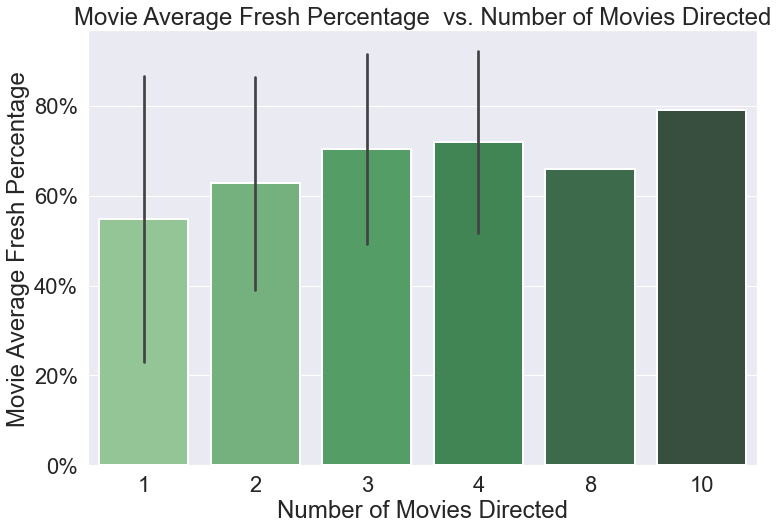

In [55]:
#Increase / customize figure size 
plt.figure(figsize=(12,8))

#Change theme color and increase font size 
sns.set_theme(style='darkgrid', font_scale=2)

#Create a barplot 
ax = sns.barplot(data=dir_eval, 
                x='num_movies', 
                y='avg_fresh_pct',
                ci='sd',
                linewidth=2,
                palette="Greens_d")

#Set the labels and title for graph
ax.set(xlabel='Number of Movies Directed',
       ylabel='Movie Average Fresh Percentage',
       title='Movie Average Fresh Percentage  vs. Number of Movies Directed')

#Format y-axis ticks to be in percentage format instead of decimal
yvalues = ['{:,.0f}'.format(x) + '%' for x in ax.get_yticks() * 100]
ax.set_yticklabels(yvalues)

#Only return plot to console
plt.show()

### Plot Number of Movies with Writing Credit vs. Movie Average Fresh Percentage

<ipython-input-56-c9488dd1144a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yvalues)


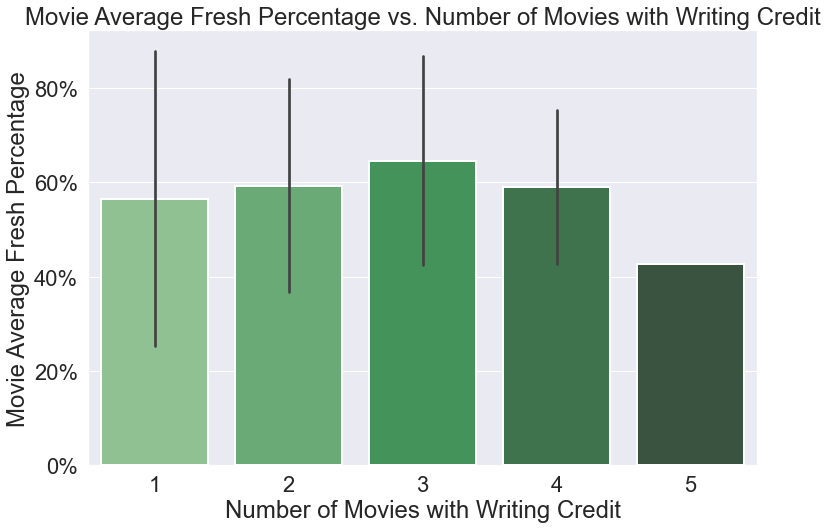

In [56]:
#Increase / customize figure size 
plt.figure(figsize=(12,8))

#Change theme color and increase font size 
sns.set_theme(style='darkgrid', font_scale=2)

#Create a barplot 
ax = sns.barplot(data=wrt_eval, 
                x='num_movies', 
                y='avg_fresh_pct',
                ci='sd',
                linewidth=2,
                palette="Greens_d")

#Set the labels and title for graph
ax.set(xlabel='Number of Movies with Writing Credit',
       ylabel='Movie Average Fresh Percentage',
       title='Movie Average Fresh Percentage vs. Number of Movies with Writing Credit')

#Format y-axis ticks to be in percentage format instead of decimal
yvalues = ['{:,.0f}'.format(x) + '%' for x in ax.get_yticks() * 100]
ax.set_yticklabels(yvalues)



#Only return plot to console
plt.show()

### Plot Genre vs. Movie Average Fresh Percentage

<ipython-input-57-a74f86e1fd14>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yvalues)


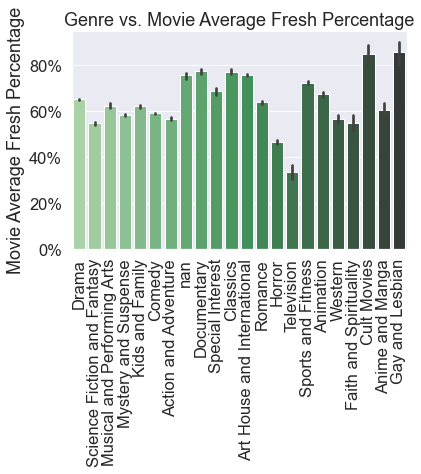

In [57]:
#Genre vs. fresh percentage bar graph
ndf = rotten_tomatoes_full.explode('genre').reset_index(drop=True)

#Decrease font size
sns.set(font_scale=1.5)

#Barplot variable stored 
ax = sns.barplot(data=ndf, x="genre",y="percentage", palette="Greens_d")

#Chaning labels 
ax.set(xlabel=None,
       ylabel='Movie Average Fresh Percentage',
       title='Genre vs. Movie Average Fresh Percentage')

#Format y-axis ticks to be in percentage format instead of decimal
yvalues = ['{:,.0f}'.format(x) + '%' for x in ax.get_yticks() * 100]
ax.set_yticklabels(yvalues)

plt.xticks(rotation=90);

### Plot Movie Rating vs. Movie Average Fresh Percentage

<ipython-input-58-5f5bb526f832>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yvalues)


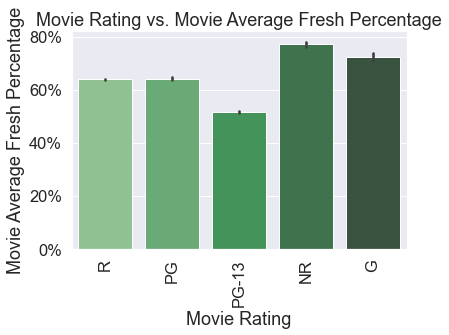

In [58]:
#Movie rating vs. fresh percentage bar graph

#Decrease font size
sns.set(font_scale=1.5)

#Barplot variable stored 
ax = sns.barplot(data=rotten_tomatoes_full, x="rating_x",y="percentage", palette="Greens_d")

#Chaning labels 
ax.set(xlabel='Movie Rating',
       ylabel='Movie Average Fresh Percentage',
       title='Movie Rating vs. Movie Average Fresh Percentage')

#Format y-axis ticks to be in percentage format instead of decimal
yvalues = ['{:,.0f}'.format(x) + '%' for x in ax.get_yticks() * 100]
ax.set_yticklabels(yvalues)

plt.xticks(rotation=90);

## Performance DF Visualizations

In [59]:
performanceDF["production_budget"].describe()

count    2.316000e+03
mean     3.790108e+07
std      5.150964e+07
min      9.000000e+03
25%      5.000000e+06
50%      1.900000e+07
75%      4.650000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

### Plot Production Budget vs. Domestic Gross

<ipython-input-60-39b39bc15f08>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-60-39b39bc15f08>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


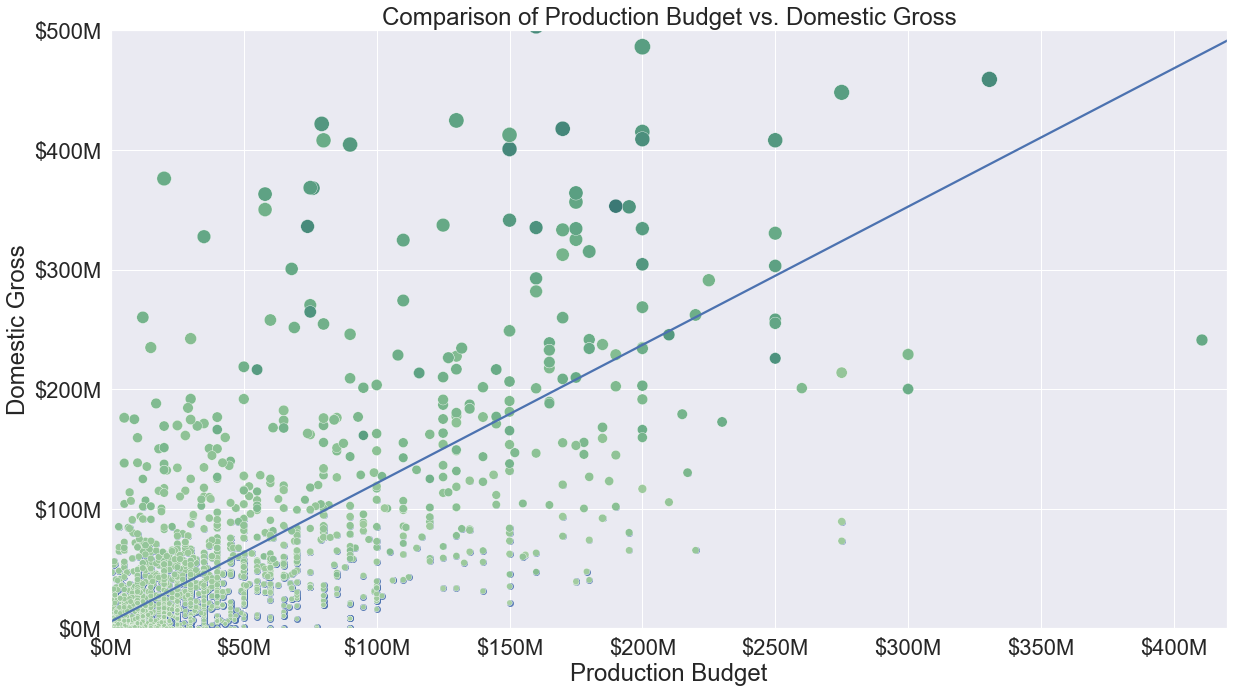

In [60]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="production_budget", y="domestic_gross", ci=None, data=performanceDF)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=performanceDF, x="production_budget", y="domestic_gross", 
                size="domestic_gross", sizes=(20, 400), hue="Profit", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,420000000])
#extending y-axis for outlier
plt.ylim(([0,500000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Production Budget", ylabel = "Domestic Gross", 
        title ='Comparison of Production Budget vs. Domestic Gross')
#creating list of formated x-ticks
xlabels = ['${:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['${:,.0f}'.format(x) + 'M' for x in gfg.get_yticks()/1000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)

#Only return plot 
plt.show()

### Plot Production Budget vs. Worldwide Gross

<ipython-input-61-bbc3ed8548f3>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-61-bbc3ed8548f3>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


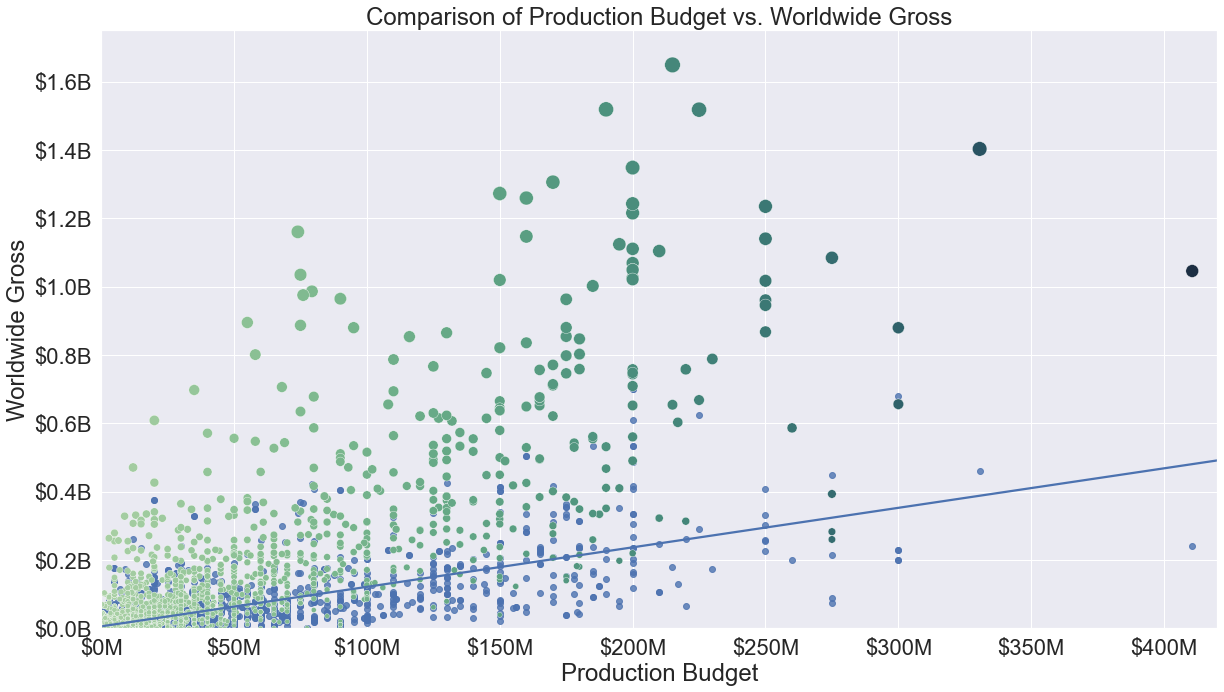

In [61]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="production_budget", y="domestic_gross", ci=None, data=performanceDF)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=performanceDF, x="production_budget", y="worldwide_gross", 
                size="worldwide_gross", sizes=(20, 400), hue="production_budget", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,420000000])
#extending y-axis for outlier
plt.ylim(([0,1750000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Production Budget", ylabel = "Worldwide Gross", 
        title ='Comparison of Production Budget vs. Worldwide Gross')
#creating list of formated x-ticks
xlabels = ['${:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['${:,.1f}'.format(x) + 'B' for x in gfg.get_yticks()/1000000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)

#Only show plot 
plt.show()

### Plot Profit vs. Product Budget

<ipython-input-62-5f6fb3cf68c4>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_xticklabels(xlabels)
<ipython-input-62-5f6fb3cf68c4>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  gfg.set_yticklabels(ylabels)


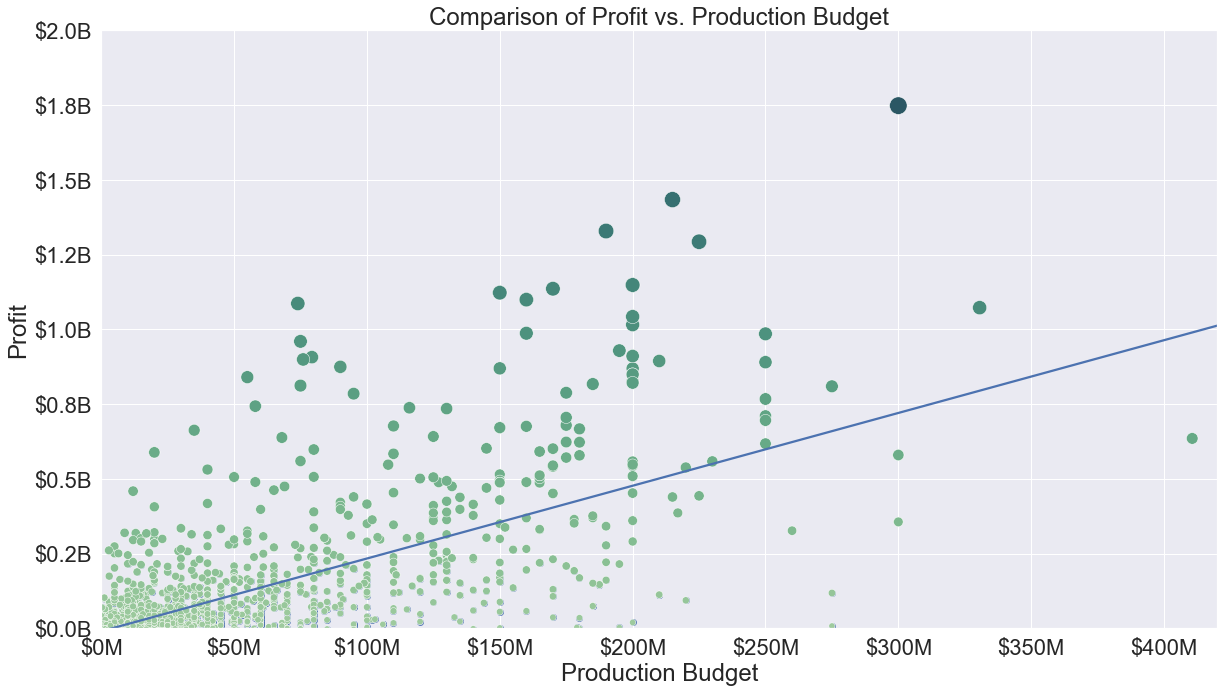

In [62]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="production_budget", y="Profit", ci=None, data=performanceDF)
#data frame with adjust x/y with aesthetics
gfg=sns.scatterplot(data=performanceDF, x="production_budget", y="Profit", 
                size="Profit", sizes=(20, 400), hue="Profit", palette="ch:r=-.5,l=.75", legend=False)
#expanding x-axis
plt.xlim([0,420000000])
#extending y-axis for outlier
plt.ylim(([0,2000000000]))
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
gfg.set(xlabel ="Production Budget", ylabel = "Profit", 
        title ='Comparison of Profit vs. Production Budget')
#creating list of formated x-ticks
xlabels = ['${:,.0f}'.format(x) + 'M' for x in gfg.get_xticks()/1000000]
#replacing x-ticks
gfg.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['${:,.1f}'.format(x) + 'B' for x in gfg.get_yticks()/1000000000]
#replacing y-ticks
gfg.set_yticklabels(ylabels)

#Only return graph 
plt.show()

### Plot Vote Average vs. Production Budget

<ipython-input-63-f2146c2b2e59>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  pbva.set_xticklabels(xlabels)
<ipython-input-63-f2146c2b2e59>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  pbva.set_yticklabels(ylabels)


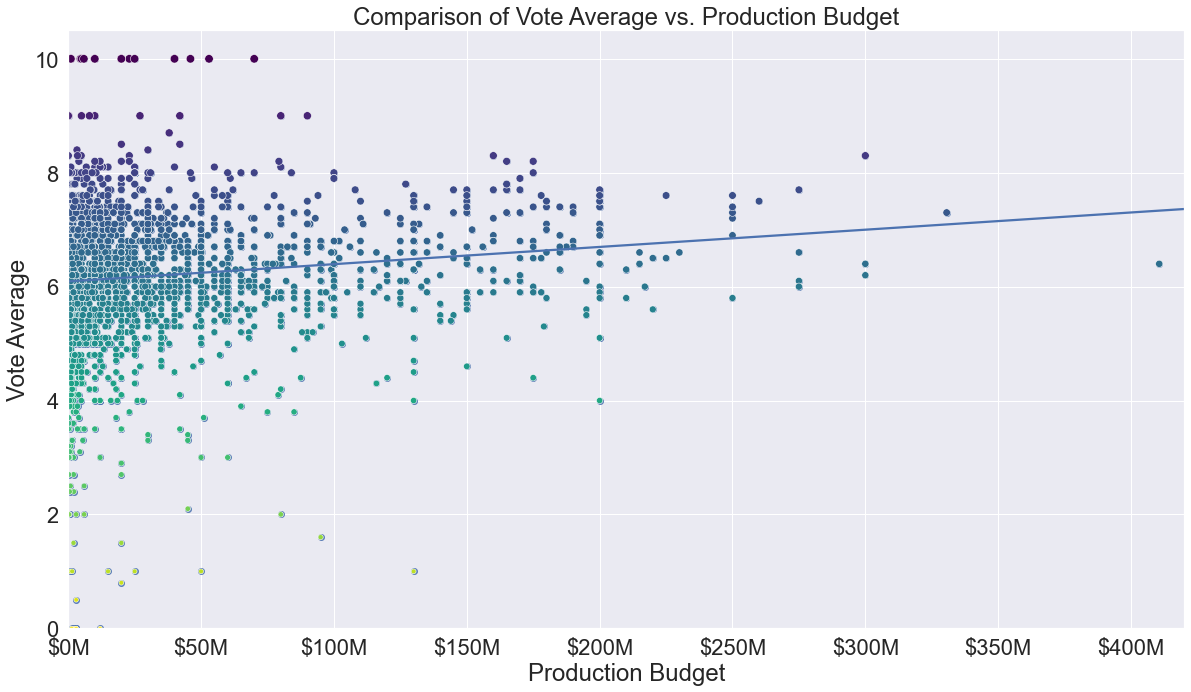

In [63]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
pbva=sns.regplot(x="production_budget", y="vote_average", ci=None, data=performanceDF)
#data frame with adjust x/y with aesthetics
pbva=sns.scatterplot(data=performanceDF, x="production_budget", y="vote_average", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim([0, 420000000])
#extending y-axis for outlier
plt.ylim(0)
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
pbva.set(xlabel ="Production Budget", ylabel = "Vote Average", 
        title ='Comparison of Vote Average vs. Production Budget')
#creating list of formated x-ticks
xlabels = ['${:,.0f}'.format(x) + 'M' for x in pbva.get_xticks()/1000000]
#replacing x-ticks
pbva.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) for x in pbva.get_yticks()]
#replacing y-ticks
pbva.set_yticklabels(ylabels)

#Show graph only
plt.show()

### Plot Domestic Gross Revenue vs. Vote Average

<ipython-input-64-17492183cf64>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  dgva.set_xticklabels(xlabels)
<ipython-input-64-17492183cf64>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  dgva.set_yticklabels(ylabels)


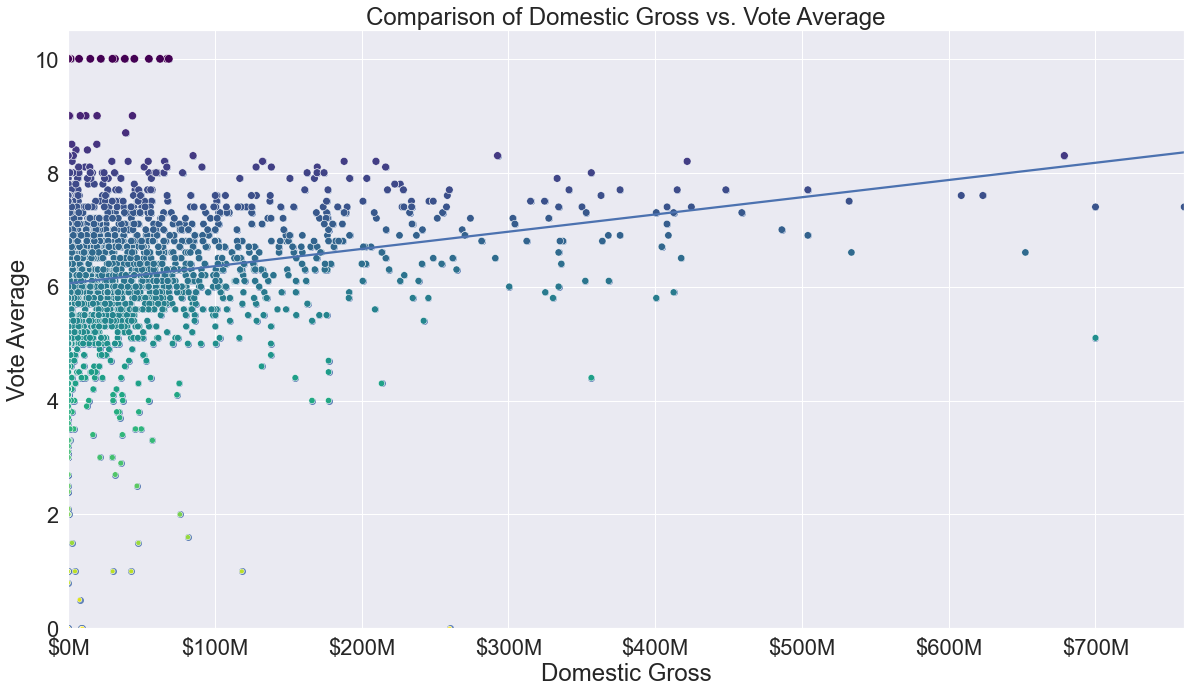

In [64]:
#Domestic gross revenue vs. Vote Average

#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
sns.regplot(x="domestic_gross", y="vote_average", ci=None, data=performanceDF)
#data frame with adjust x/y with aesthetics
dgva=sns.scatterplot(data=performanceDF, x="domestic_gross", y="vote_average", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim(0)
#extending y-axis for outlier
plt.ylim(0)
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
dgva.set(xlabel ="Domestic Gross", ylabel = "Vote Average", 
        title ='Comparison of Domestic Gross vs. Vote Average')
#creating list of formated x-ticks
xlabels = ['${:,.0f}'.format(x) + 'M' for x in dgva.get_xticks()/1000000]
#replacing x-ticks
dgva.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) for x in dgva.get_yticks()]
#replacing y-ticks
dgva.set_yticklabels(ylabels)

#Only return plot
plt.show()

### Plot Worldwide Revenue vs. Vote Average

<ipython-input-65-931357618282>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  vawwg.set_xticklabels(xlabels)
<ipython-input-65-931357618282>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  vawwg.set_yticklabels(ylabels)


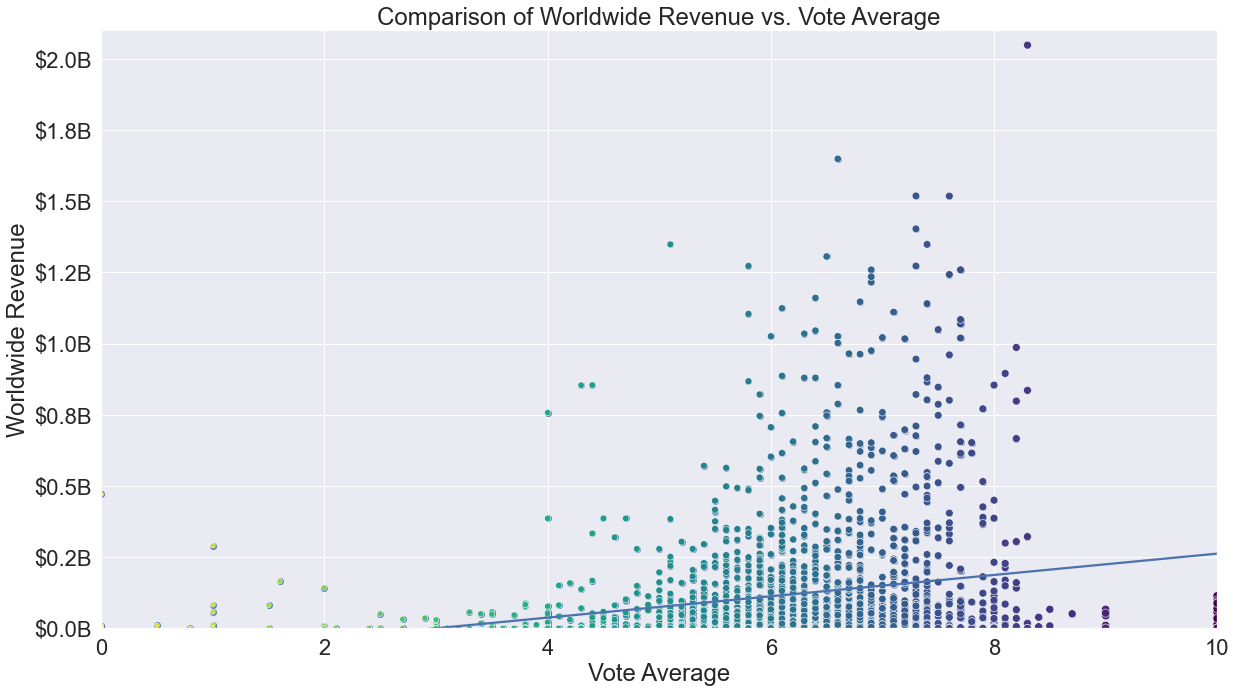

In [65]:
#sets background color and increase in font size
sns.set_theme(style="darkgrid", font_scale=2)
#increase figure size
plt.figure(figsize=(20,11))
#regression line plot
vawwg=sns.regplot(x="vote_average", y="worldwide_gross", ci=None, data=performanceDF)
#data frame with adjust x/y with aesthetics
vawwg=sns.scatterplot(data=performanceDF, x="vote_average", y="worldwide_gross", 
                size="vote_average", hue="vote_average", palette="viridis_r", legend=False)
#expanding x-axis
plt.xlim(0)
#extending y-axis for outlier
plt.ylim([0,2100000000])
#supressing scientific notation
plt.ticklabel_format(style='plain')
# add label to the axis and label to the plot
vawwg.set(xlabel ="Vote Average", ylabel = "Worldwide Gross", 
        title ='Comparison of Worldwide Gross vs. Vote Average')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in vapb.get_xticks()/1000000]
xlabels = ['{:,.0f}'.format(x) for x in vawwg.get_xticks()]
#replacing x-ticks
vawwg.set_xticklabels(xlabels)
#creating list of formated y-ticks
# ylabels = ['{:,.0f}'.format(x) for x in vapb.get_yticks()]
ylabels = ['${:,.1f}'.format(x) + 'B' for x in vawwg.get_yticks()/1000000000]
#replacing y-ticks
vawwg.set_yticklabels(ylabels)

#Only show plot
plt.show()

### Plot Original Language vs. Average World Gross

Need to manipulate new data frame that drops the **`original_title`** column from the *MoviesDB* dataframe. Must then change the variable name from **`title`** to **`movie`** - this makes the merge code work. More observations are present in the **`title`** column than in the **`original_title`** column, so we want to use this as the foundation of analysis.

In [67]:
df1 = tmdbDF.drop(columns=(['original_title']))
df1 = df1.rename(columns={'title': 'movie'})
df2 = pd.merge(df1, tnmDF, on='movie', how='inner')

<ipython-input-69-5c6f7be0b8f3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  wgl.set_yticklabels(ylabels)


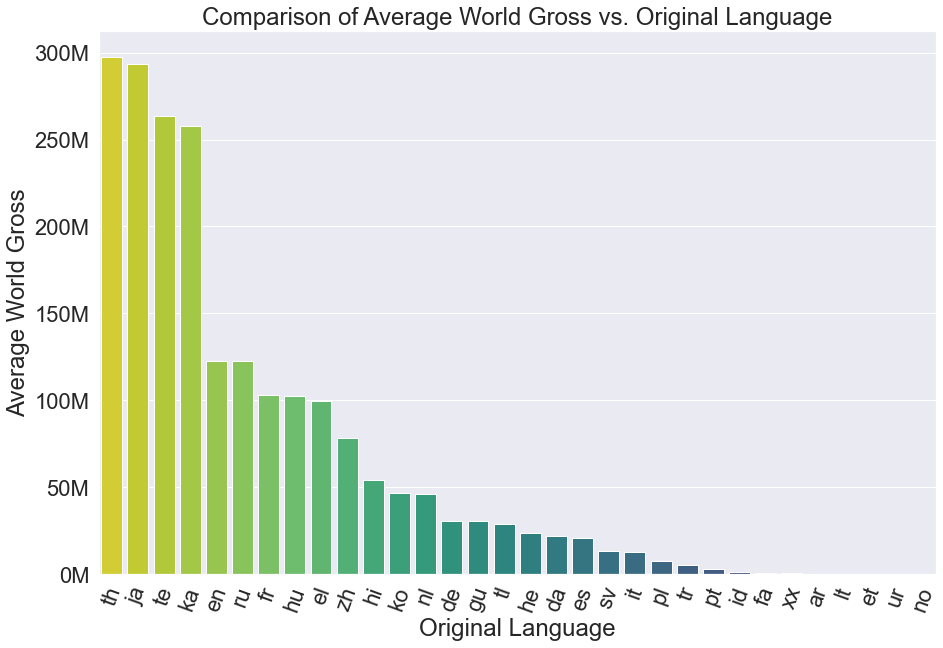

In [69]:
total=df2.groupby(['original_language'])['worldwide_gross'].mean().reset_index(name='Average_world_gross')

plt.figure(figsize=(15,10))
jdf6 = total.sort_values(['Average_world_gross'], ascending=False)
wgl=sns.barplot(x = "original_language", y = "Average_world_gross", data = jdf6,  palette="viridis_r")
plt.xticks(rotation=70)

wgl.set(xlabel ="Original Language", ylabel = "Average World Gross", 
        title ='Comparison of Average World Gross vs. Original Language')
#creating list of formated x-ticks
# xlabels = ['{:,.0f}']
# #replacing x-ticks
# gifr.set_xticklabels(xlabels)
#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in wgl.get_yticks()/1000000]
#replacing y-ticks
wgl.set_yticklabels(ylabels)

#Only show graph 
plt.show()

### Plot Voter Average vs. Original Language

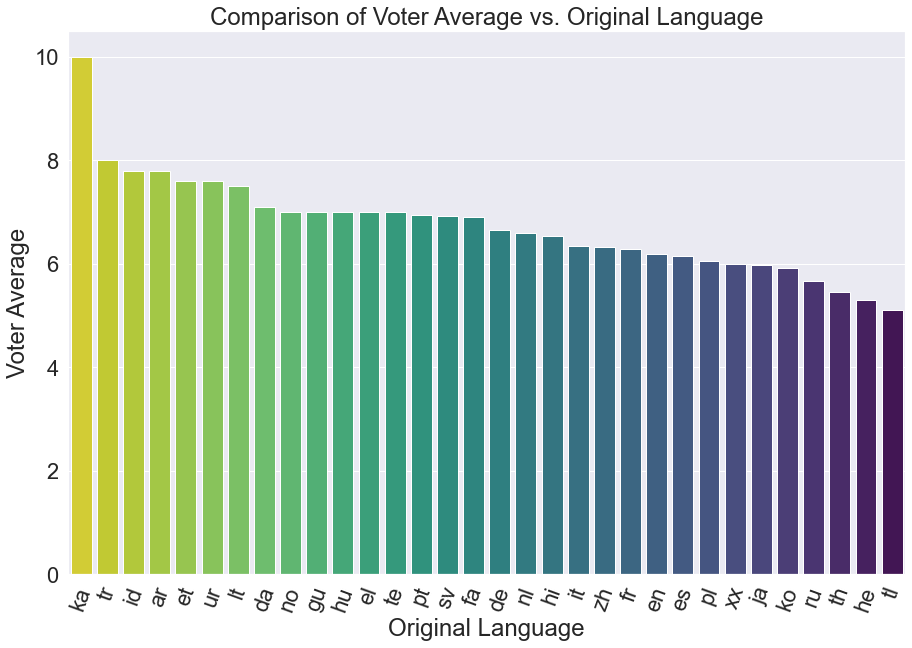

In [70]:
total_2 = df2.groupby(['original_language'])['vote_average'].mean().reset_index(name='Voter_Average')
T3=total_2.sort_values(['Voter_Average'], ascending=False)
# # sns.barplot(x = "original_language", y = "Voter_Average", data =total_2,  palette="viridis_r")

plt.figure(figsize=(15,10))
#total_2=total_2.sort_values(['vote_average'], ascending=False)
olvg=sns.barplot(x = "original_language", y = "Voter_Average", data =T3,  palette="viridis_r")
plt.xticks(rotation=70)

olvg.set(xlabel ="Original Language", ylabel = "Voter Average", 
        title ='Comparison of Voter Average vs. Original Language')

#Show plot
plt.show()

### Plot Production Budget vs. Original Language

<ipython-input-71-4a451cf41e2f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  pdol.set_yticklabels(ylabels)


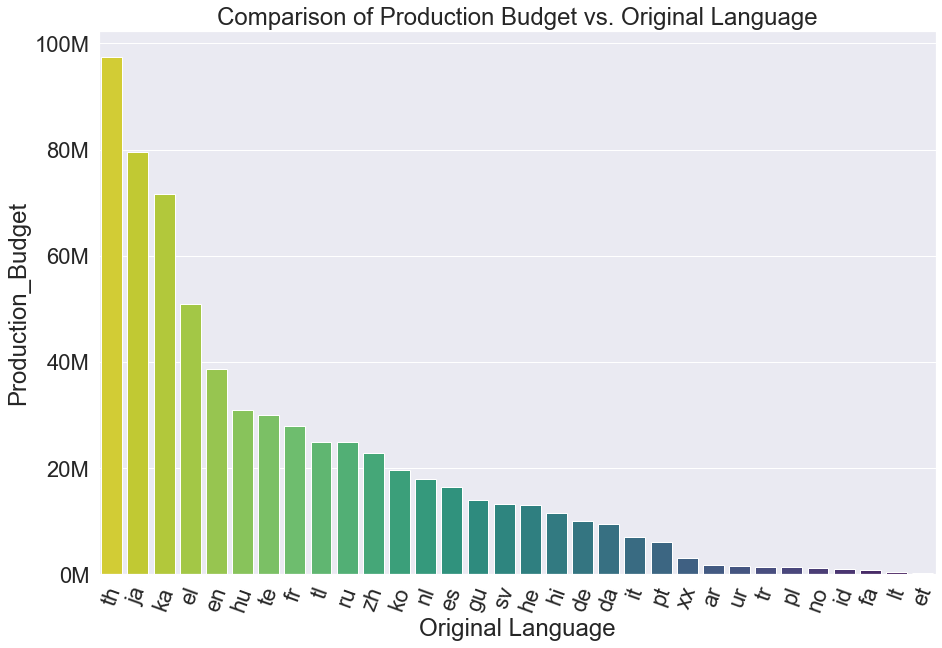

In [71]:
total_3 = df2.groupby(['original_language'])['production_budget'].mean().reset_index(name='Production_Budget')
T4 = total_3.sort_values(['Production_Budget'], ascending=False)
plt.figure(figsize=(15,10))
pdol=sns.barplot(x = "original_language", y = "Production_Budget", data =T4,  palette="viridis_r")

plt.xticks(rotation=70)

pdol.set(xlabel ="Original Language", ylabel = "Production Budget", 
        title ='Comparison of Production Budget vs. Original Language')

ylabels = ['{:,.0f}'.format(x) + 'M' for x in pdol.get_yticks()/1000000]
pdol.set_yticklabels(ylabels)

#Show plot only
plt.show()

## Studio DF Visualizations

### Plot Genre vs. Foreign Revenue

<ipython-input-72-ce7fa81fd143>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  gifr.set_yticklabels(ylabels)


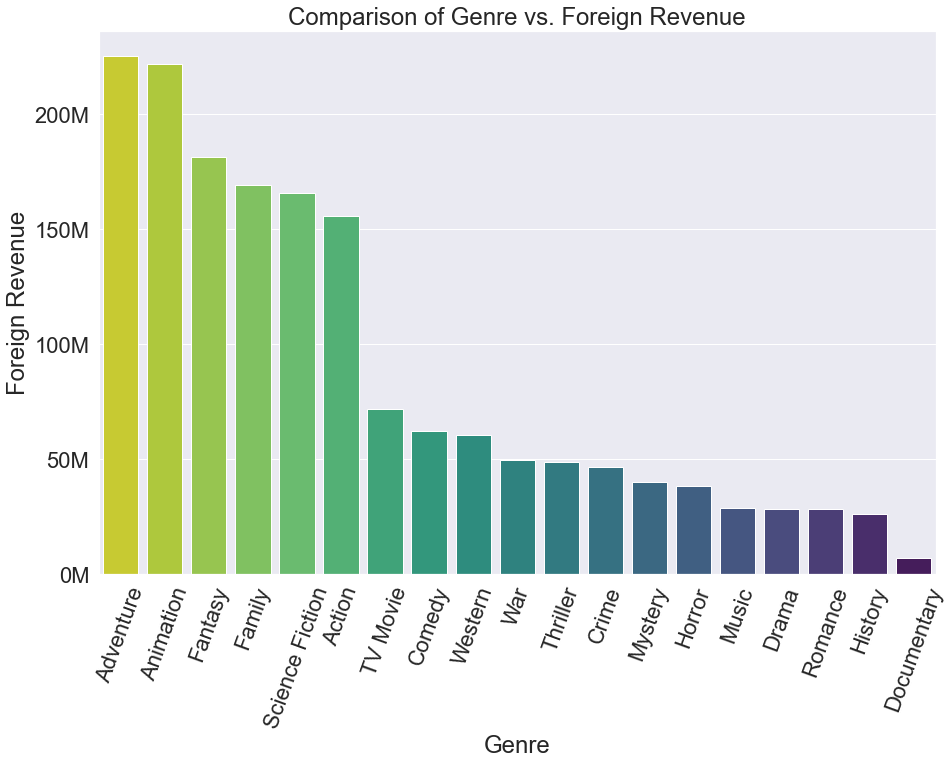

In [72]:
plt.figure(figsize=(15,10))
gifr=sns.barplot(x = "genre_ids", y = "Foreign_Revenue", data = jdf4, palette="viridis_r")
plt.xticks(rotation=70)

gifr.set(xlabel ="Genre", ylabel = "Foreign Revenue", 
        title ='Comparison of Genre vs. Foreign Revenue')

#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in gifr.get_yticks()/1000000]
#replacing y-ticks
gifr.set_yticklabels(ylabels)

#Show plot only
plt.show()

### Plot Genre vs. Domestic Revenue

<ipython-input-73-9204151521f7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  drg.set_yticklabels(ylabels)


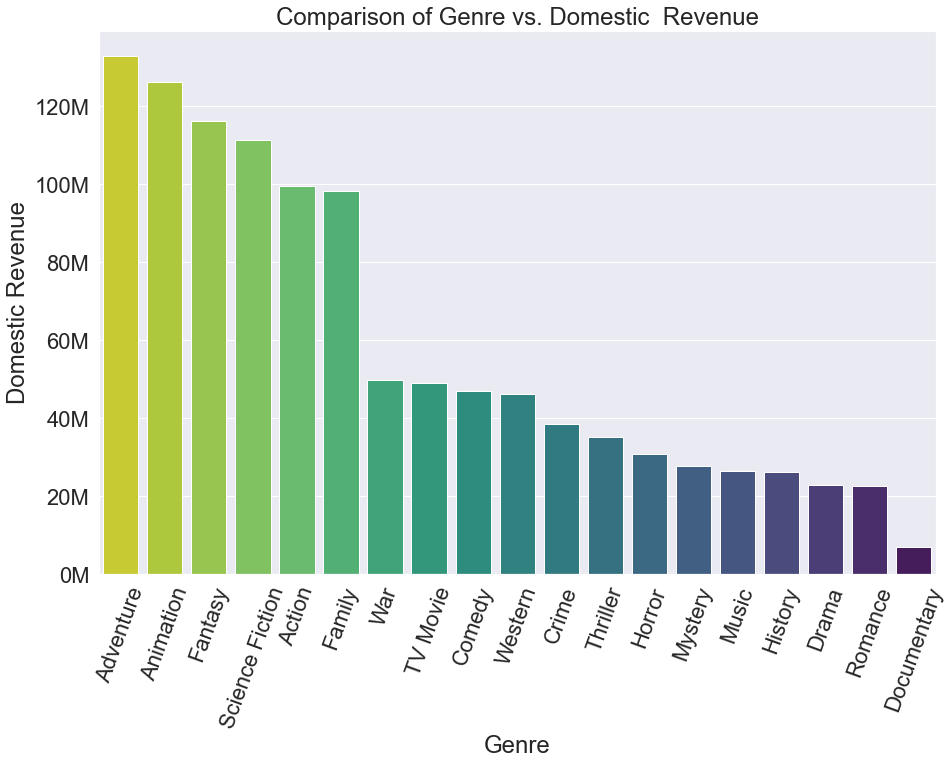

In [73]:
plt.figure(figsize=(15,10))
jdf5 = jdf2.groupby(['genre_ids'])['domestic_gross'].mean().reset_index(name='Domestic_Revenue')
jdf5 = jdf5.sort_values(['Domestic_Revenue'], ascending=False)
drg = sns.barplot(x = "genre_ids", y = "Domestic_Revenue", data = jdf5,  palette="viridis_r")
plt.xticks(rotation=70)


drg.set(xlabel ="Genre", ylabel = "Domestic Revenue", 
        title ='Comparison of Genre vs. Domestic  Revenue')

#creating list of formated y-ticks
ylabels = ['{:,.0f}'.format(x) + 'M' for x in drg.get_yticks()/1000000]
#replacing y-ticks
drg.set_yticklabels(ylabels)

#Only show plot
plt.show()

### Plot Vote Average vs. Genre

In [74]:
genre_average_rt = new_df.groupby('genre_ids')['vote_average'].mean().sort_values()
genre_count_rt = to_1D(tmdbDF["genre_ids"]).value_counts()

genre_ids
Horror             4.847624
Thriller           5.354433
Science Fiction    5.442736
Action             5.578560
Mystery            5.730315
TV Movie           5.806827
Crime              5.852475
Adventure          5.930071
Comedy             5.942074
Fantasy            5.952327
Western            5.955610
Romance            5.981603
Family             5.990479
Drama              6.112200
War                6.229394
Animation          6.464805
History            6.661415
Documentary        6.817946
Music              6.952407
Name: vote_average, dtype: float64

Popularity Analysis
We can observe from the data above that out of the most produced genres, the highest rated ones are:

* Documentary
* Drama
* Comedy
* Thriller
* Horror

With both Thriller and Horror movies being the lowest rated on average amongst the most popular genres

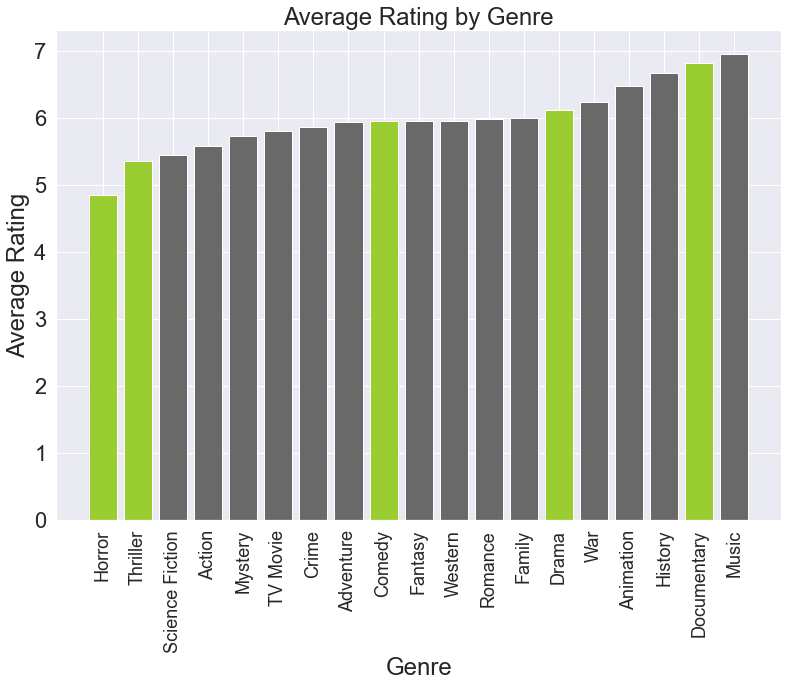

In [76]:
# Graphing average rating by movie genre, highlighted most popular
plt.rcParams["figure.figsize"] = (13,9)
fig, ax = plt.subplots()

my_cmap = plt.get_cmap('viridis')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
ax.bar(genre_average_rt.index,genre_average_rt, color='dimgray') # 'silver' my_cmap(rescale(genre_average_rt
ax.set_title('Average Rating by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating')
ax.tick_params(axis='x', labelrotation=90.0)
plt.xticks(fontsize=18)
for genre in genre_count_rt.sort_values(ascending=False).index:
    highlight = genre
    pos = genre_average_rt.index.get_loc(highlight)
    ax.patches[pos].set_facecolor('yellowgreen') # '#aa3333'
    if genre == 'Horror':
        break
plt.savefig('rating_genre.jpg')

### Plot Number of Movie Releases by Genre

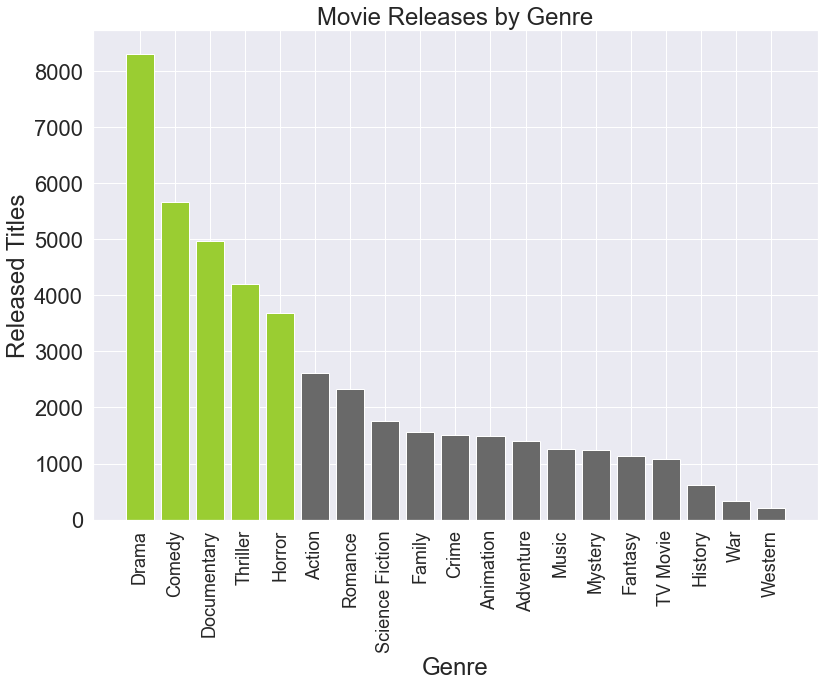

In [77]:
fig, ax = plt.subplots()
my_cmap = plt.get_cmap('viridis')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
ax.bar(genre_count_rt.index, genre_count_rt, color='dimgray') # 'silver' #color=my_cmap(rescale(genre_count_rt))
ax.set_title('Movie Releases by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Released Titles')
ax.tick_params(axis='x', labelrotation=90.0)
plt.xticks(fontsize=18)
for genre in genre_count_rt.index:
    highlight = genre
    pos = genre_count_rt.index.get_loc(highlight)
    ax.patches[pos].set_facecolor('yellowgreen') # '#aa3333'
    if genre == 'Horror':
        break
plt.savefig('release_genre.jpg')

## Statistical Inference
Hypothesis testing, confidence intervals, etc. used to provide inferences about the larger population of movie successes 

***Null Hypothesis:*** Distributions of movie Fresh percentage for first time directors are statistically similar to experienced directors.

***Alternative Hypothesis:*** Distributions of movie average Fresh percentage for experienced directors are higher than for first time directors.


We first want to divided our sample into two independent groups:
* Control: This only includes data from directors who have directed less than 2 movies
* Experimental: This only includes data from directors who have directed 2 or more movies

In [78]:
control = dir_eval.loc[dir_eval['num_movies'] < 2]['avg_fresh_pct']
experimental = dir_eval.loc[dir_eval['num_movies'] >= 2]['avg_fresh_pct']

Now inspect the distribution plots of the average movie fresh percentage. The peak for the experimental group appears to be higher than that of the control group.

C:\Users\asurowiec\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asurowiec\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-79-4317e2fb1553>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xvalues)


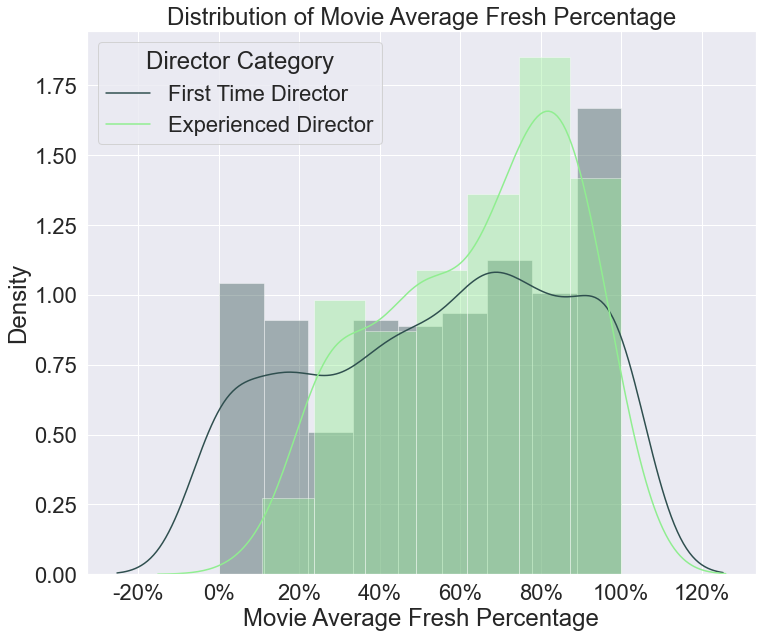

In [79]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)}, font_scale=2)
ax = sns.distplot(control, color='darkslategrey') # Blue distribution
ax = sns.distplot(experimental, color='lightgreen') # Green distribution


#Set the labels and title for graph
ax.set(xlabel='Movie Average Fresh Percentage',
       ylabel='Density',
       title='Distribution of Movie Average Fresh Percentage')

#Format y-axis ticks to be in percentage format instead of decimal
xvalues = ['{:,.0f}'.format(x) + '%' for x in ax.get_xticks() * 100]
ax.set_xticklabels(xvalues)

plt.legend(title='Director Category', loc='upper left', labels=['First Time Director', 'Experienced Director'])

#Only return plot to console
plt.show()

Quickly look at the difference between the means of each sample.

In [80]:
control.mean()
experimental.mean()
experimental.mean() - control.mean()

0.09368066763426253

The group with experienced directors has a higher average sample mean for average movie fresh percentage.

Now need to perform the ***shapiro test*** to confirm or deny whether these samples are normally distributed. This will impact the valid hypothesis tests we can run.

Experimental 0.9452062845230103 1.9644268832053058e-05
Control 0.9388511776924133 4.014504050833386e-17


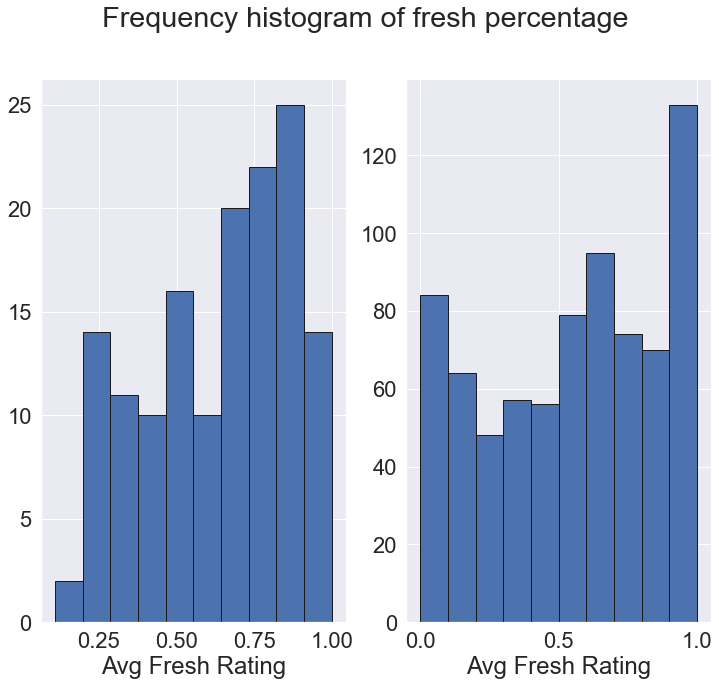

In [81]:
#Determine if data is normally distributed 

ew, epvalue = stats.shapiro(experimental)
print("Experimental", ew, epvalue)

w, pvalue = stats.shapiro(control)
print("Control", w, pvalue)

# plot histogram
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of fresh percentage')
ax1.hist(experimental, bins=10, histtype='bar', ec='k') 
ax2.hist(control, bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Avg Fresh Rating")
ax2.set_xlabel("Avg Fresh Rating")
plt.show()

The p-value of the shapiro test is less than 0.05 on both samples, this rejects the hypothesis that the each sample is normally distributed. Due to the non normal data we decide to run a **`Mann-Whitney U Test`** that will test whether the samples have similar distributions. We can run a one tail version of this test to determine which sample set has the higher median.

In [82]:
#Mann-Whitney U test 
stats.mannwhitneyu(x=experimental, y=control, alternative = 'greater')

MannwhitneyuResult(statistic=63192.0, pvalue=0.001584754257076086)

The p-value of the **`Mann-Whitney U Test`** is less than 0.05, so we can conclude at 95% confidence that the average movie fresh percentage is significantly greater for movies directed by a director who has worked on more than 1 movie.

This leads us to believe that if you hire an experienced director, then you can expect the percentage of fresh scores for your movie to be higher than if you had hired a director filming their first movie. 

### Linear Models
Here we can get equations that we can use to interpret relationships between variables.

In [83]:
#Linear Model 1
#Determine if there is a relationship between number of movies directed and average fresh percentage


x_lin1 = np.array(dir_eval[['num_movies']].to_numpy())
y_lin1 = np.array(dir_eval[['avg_fresh_pct']].to_numpy())

# import statsmodels.api as sm
X1 = sm.add_constant(x_lin1)
model1 = sm.OLS(y_lin1,X1)
model1 = model1.fit()
model1.tvalues 

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.50
Date:                Fri, 03 Mar 2023   Prob (F-statistic):            0.00124
Time:                        08:38:57   Log-Likelihood:                -211.74
No. Observations:                 904   AIC:                             427.5
Df Residuals:                     902   BIC:                             437.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4982      0.023     22.120      0.000       0.454       0.542
x1             0.0538      0.017      3.240      0.001       0.021       0.086
==============================================================================
Omnibus:                      271.698   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.033
Skew:                          -0.255   Prob(JB):                     5.02e-12
Kurtosis:                       1.941   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variables **num_movies** and **avg_fresh_percentage** are not highly correlated. The model tells us that at 0 movies directed, one would expect a fresh percentage to be around 50%, as a director gains one movie in experience the fresh percentage is expected to increase by 5%. 

Both variables are statistically significant with a low p-value. Changes in percentage are associated with changes in the dependent variable at the population level - the low R-squared value indicates that there are others factors that influence the change in percentage of ratings being fresh. 

In [84]:
#Linear Model 2
#Determine if there is a relationship between box office earnings and average fresh percentage


x_lin2 = np.array(box_rotten_tomatoes[['percentage']].apply(lambda x: x*100).to_numpy())
y_lin2 = np.array(box_rotten_tomatoes[['box_office']].to_numpy())

# import statsmodels.api as sm
X2 = sm.add_constant(x_lin2)
model2 = sm.OLS(y_lin2,X2)
model2 = model2.fit()
model2.tvalues 

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     135.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.56e-31
Time:                        08:38:57   Log-Likelihood:            -6.4846e+05
No. Observations:               33310   AIC:                         1.297e+06
Df Residuals:                   33308   BIC:                         1.297e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.342e+07   9.19e+05     47.252      0.000    4.16e+07    4.52e+07
x1          1.667e+05   1.43e+04     11.624      0.000    1.39e+05    1.95e+05
==============================================================================
Omnibus:                    14162.587   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59789.084
Skew:                           2.124   Prob(JB):                         0.00
Kurtosis:                       8.003   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variables **`box_office`** and **`percentage`** are not highly correlated - this could be due to the small number of box office earnings observations in our data. The model is telling us that if a movie had a rating of zero, we can expect a *`$43M`* dollars. For every fresh percentage increase `(+1%)`, we can expect to see box office revenue to increase by *`$16.7K`*. 

Both variables are statistically significant with a low p-value. Changes in percentage are associated with changes in the dependent variable at the population level - the low R-squared value indicates that there are others factors that influence the change in box office revenue. 

Limitation in the models are a lack of data. There were only box office numbers for 340 movies, in order to generate a more accurate and confident model we would need to train on more data. The same goes for our first model, there were <1000 observations between the two samples. Increasing the amount of data fed into each of these models could give a better picture towards the population relationship between these key variables.

# Conclusion
The primary recommendations based on our findings.

***Recommendations:***
* Hire experienced directors for the company original content creation
* Focus on Thai and Japanese localizations
* Produce an adventure movie


***Next Steps:***
If analysis were to continue, there are multiple avenues to investigate in regards to success factors of a movie.
* Obtain more data to work with, will allow for more confident modeling, as well as new variable relationships
* Develop a method of demographic analysis of reviewers, determine relationship between demographics and movie characteristics
* Create prediction models for movie ratings, and financial outcomes of a movie
* Investigate association between variables using apriori, may uncover combinations of writers, directors, genres that typically lead to successful movies